In [ ]:
library(ggplot2)

In [4]:
moneyball <- read.csv("../input/baseball.csv") 

In [5]:
dataBefore2002 <- subset(moneyball, Year < 2002)

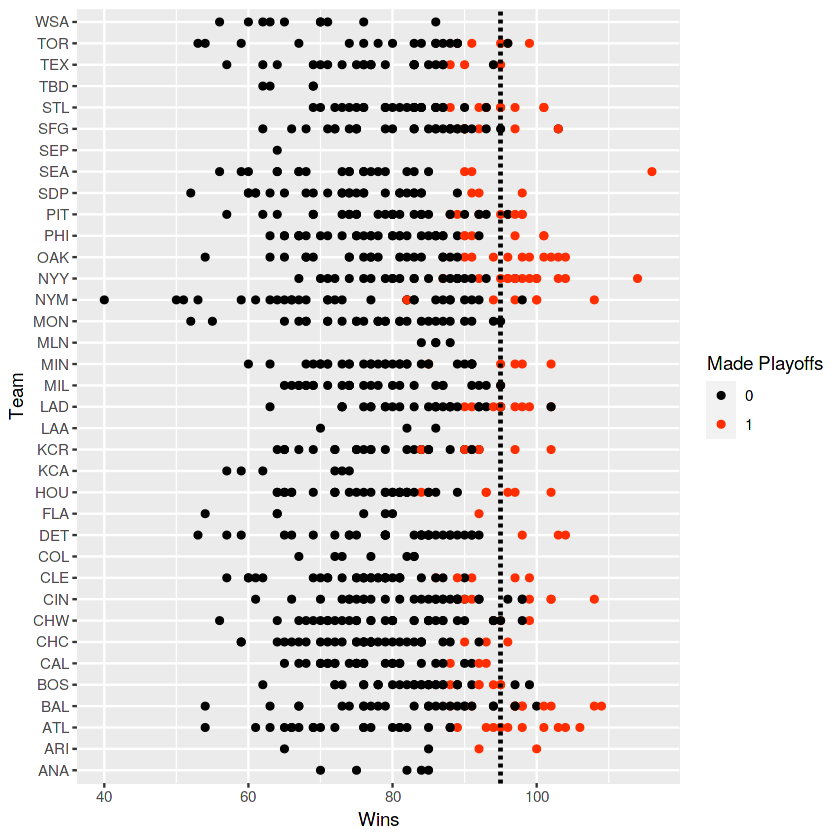

In [6]:
m <- ggplot(dataBefore2002, aes(x = W,
                               y = Team,
                               color = factor(Playoffs))) +
geom_point() + scale_color_manual(values = c("#000000", "#FF2D00"), name = "Made Playoffs")

m + geom_vline(aes(xintercept = 95), color = "black", linetype = "dashed", size=1) + xlab("Wins")

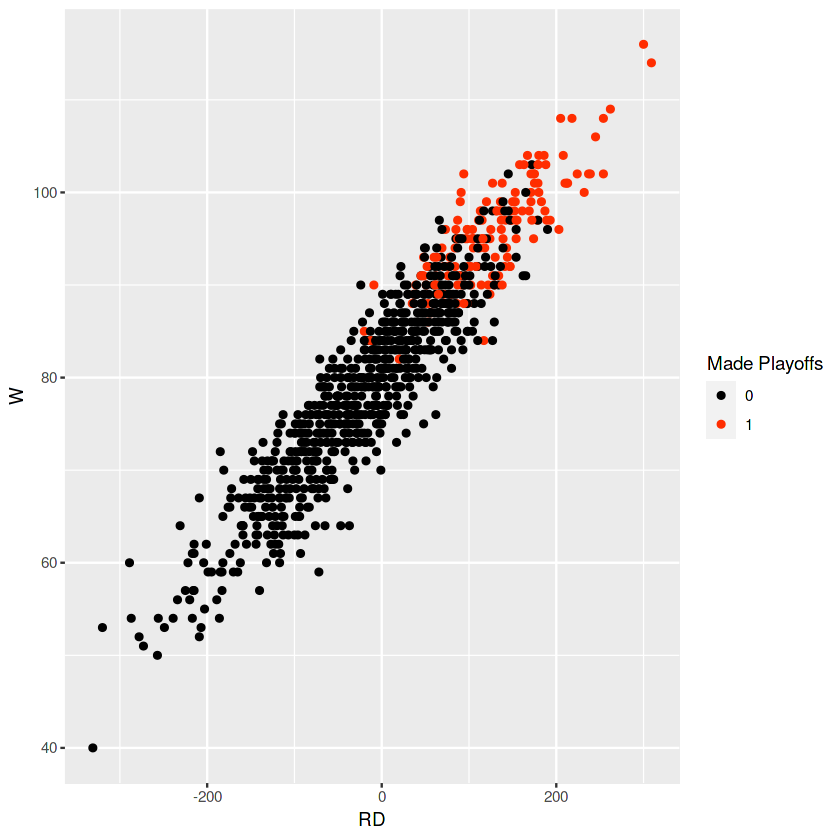

In [7]:
dataBefore2002$RD <- dataBefore2002$RS - dataBefore2002$RA

ggplot(dataBefore2002, aes(x = RD,
                            y = W,
                            color = factor(Playoffs))) +
     geom_point() + scale_color_manual(values = c("#000000", "#FF2D00"), name = "Made Playoffs")

In [8]:
winsReg <- lm(W ~ RD, data = dataBefore2002)
winsReg


Call:
lm(formula = W ~ RD, data = dataBefore2002)

Coefficients:
(Intercept)           RD  
    80.8814       0.1058  


Regression Equation:

W = 80.8814 + 0.1058(RD)

Solve for RD:

RD = (W - 80.8814) / 0.1058

Replace W with 95:

RD = (95 - 80.8814) / 0.1058

RD ≈ 133

Run differential of 133 is needed to win 95 games.

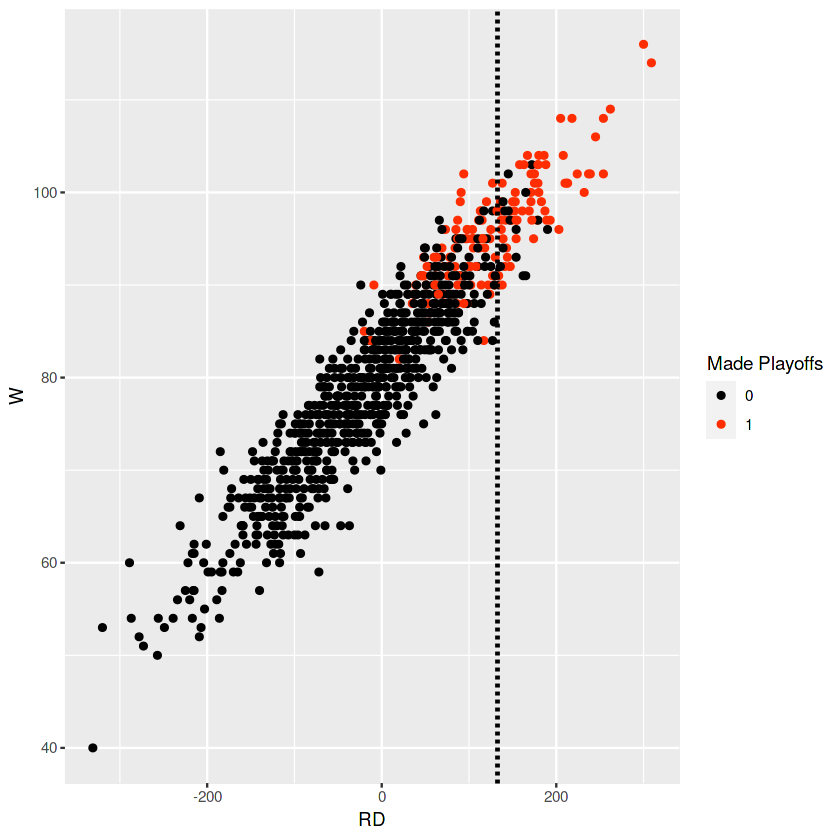

In [9]:
ggplot(dataBefore2002, aes(x = RD,
                            y = W,
                            color = factor(Playoffs))) +
     geom_point() + scale_color_manual(values = c("#000000", "#FF2D00"), name = "Made Playoffs") +
     geom_vline(aes(xintercept = 133), color = "black", linetype = "dashed", size=1)

In [17]:
runsScoredReg <- lm(RS ~ OBP + SLG + BA, data = dataBefore2002)
summary(runsScoredReg)


Call:
lm(formula = RS ~ OBP + SLG + BA, data = dataBefore2002)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.941 -17.247  -0.621  16.754  90.998 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -788.46      19.70 -40.029  < 2e-16 ***
OBP          2917.42     110.47  26.410  < 2e-16 ***
SLG          1637.93      45.99  35.612  < 2e-16 ***
BA           -368.97     130.58  -2.826  0.00482 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.69 on 898 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:   0.93 
F-statistic:  3989 on 3 and 898 DF,  p-value: < 2.2e-16


In [11]:
runsScoredRegNoBA <- lm(RS ~ OBP + SLG, data = dataBefore2002)
summary(runsScoredRegNoBA)


Call:
lm(formula = RS ~ OBP + SLG, data = dataBefore2002)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.838 -17.174  -1.108  16.770  90.036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -804.63      18.92  -42.53   <2e-16 ***
OBP          2737.77      90.68   30.19   <2e-16 ***
SLG          1584.91      42.16   37.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.79 on 899 degrees of freedom
Multiple R-squared:  0.9296,	Adjusted R-squared:  0.9294 
F-statistic:  5934 on 2 and 899 DF,  p-value: < 2.2e-16


In [12]:
runsAllowedReg <- lm(RA ~ OOBP + OSLG, data = dataBefore2002)
summary(runsAllowedReg)


Call:
lm(formula = RA ~ OOBP + OSLG, data = dataBefore2002)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.397 -15.178  -0.129  17.679  60.955 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -837.38      60.26 -13.897  < 2e-16 ***
OOBP         2913.60     291.97   9.979 4.46e-16 ***
OSLG         1514.29     175.43   8.632 2.55e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.67 on 87 degrees of freedom
  (812 observations deleted due to missingness)
Multiple R-squared:  0.9073,	Adjusted R-squared:  0.9052 
F-statistic: 425.8 on 2 and 87 DF,  p-value: < 2.2e-16


In [ ]:
Regression Equation for Runs Allowed:

RA = -837.38 + 2913.60(OOBP) + 1514.29(OSLG)


Regression Equation for Runs Scored:

RS = -804.63 + 2737.77(OBP) + 1584.91(SLG)


Regression Equation for games won: 

W = 80.8814 + 0.1058(146)
